In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def GenerateClassLabel(input_features, num_classes, add_random_noise=True, random_noise_spread=0.1):
    target_function = sum(input_features) 
    if add_random_noise:
        target_function += np.random.normal(scale=random_noise_spread)
    return int(target_function*num_classes)%num_classes

In [3]:
rf_training_sample_size = []
rf_out_of_sample_performance = []

for i in range(0, 1000, 50):
    num_train_samples = 100+i*100
    num_test_samples = 50000
    
    num_train_features = 5
    n_classes = 3

    X_train = np.random.random(size=(num_train_samples, num_train_features))
    y_train = np.array([GenerateClassLabel(x, n_classes) for x in X_train], dtype=np.int)

    
    X_test = np.random.random(size=(num_test_samples, num_train_features))
    y_test = np.array([GenerateClassLabel(x, n_classes) for x in X_test], dtype=np.int)
    
    random_forest_classifier = RandomForestClassifier(n_estimators=50)
    

    random_forest_classifier.fit(X_train, y_train)
    rf_training_sample_size.append(num_train_samples)
    y_pred = random_forest_classifier.predict(X_test)
    rf_out_of_sample_performance.append(accuracy_score(y_test, y_pred))

(1000.0, 100000.0)

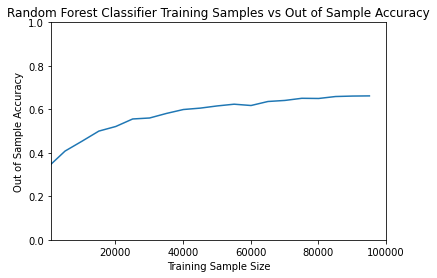

In [4]:
plt.plot(rf_training_sample_size, rf_out_of_sample_performance)
plt.xlabel('Training Sample Size')
plt.ylabel('Out of Sample Accuracy')
plt.title('Random Forest Classifier Training Samples vs Out of Sample Accuracy')
plt.ylim((0,1))
plt.xlim((1000, 100000))